# generate noisy mock data using the `provabgs` pipeline
This will serve as the L1 test that will confirm that the model and inference pipelines are working!

In [1]:
import os
import numpy as np 
# --- plotting --- 
import corner as DFM
import matplotlib as mpl
import matplotlib.pyplot as plt
#if 'NERSC_HOST' not in os.environ.keys():
#    mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [2]:
from gqp_mc import data as Data

# read $\theta_{\rm obs}$, $\lambda_{\rm obs}$, $f_{\rm obs}$

In [3]:
wave_obs = np.load('/global/cscratch1/sd/chahah/gqp_mc/mini_mocha/provabgs_mocks/provabgs_mock.wave.npy')
theta_obs = np.load('/global/cscratch1/sd/chahah/gqp_mc/mini_mocha/provabgs_mocks/provabgs_mock.theta.npy')
flux_obs = np.load('/global/cscratch1/sd/chahah/gqp_mc/mini_mocha/provabgs_mocks/provabgs_mock.flux.npy')

In [4]:
z_obs = 0.2

Toned down fit of the noise

In [11]:
wave_obs = np.linspace(3e3, 1e4, 1000)
sig_flux_obs = 200. * np.exp(-(wave_obs - 2000.)/350.) + 0.3
ivar_obs = sig_flux_obs**-2

(0.0, 10)

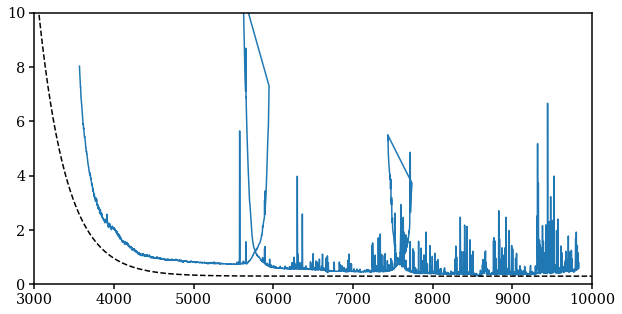

In [7]:
spec, meta = Data.Spectra(sim='lgal', noise='bgs', lib='bc03', sample='mini_mocha')
fig = plt.figure(figsize=(10,5))
sub = fig.add_subplot(111)
sub.plot(spec['wave'], spec['ivar'][0]**-0.5)
sub.plot(wave_obs, sig_flux_obs, c='k', ls='--')
sub.set_xlim(3e3, 1e4)
sub.set_ylim(0., 10)

In [8]:
noisy_flux_obs = []
for f in flux_obs: 
    noisy_flux_obs.append(f + np.random.normal(size=len(wave_obs)) * sig_flux_obs)

(0.0, 20)

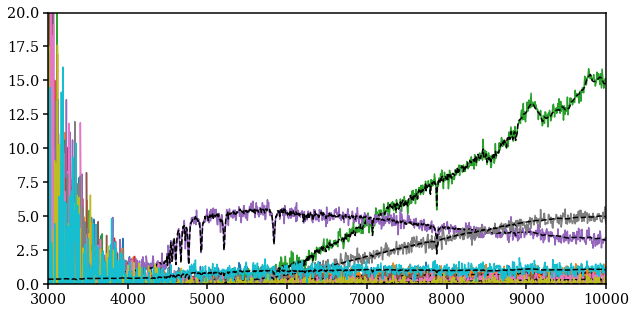

In [9]:
fig = plt.figure(figsize=(10,5))
sub = fig.add_subplot(111)
for i, f, nf in zip(range(10), flux_obs, noisy_flux_obs): 
    sub.plot(wave_obs, nf, c='C%i' % i)
    sub.plot(wave_obs, f, c='k', ls='--')
sub.set_xlim(3e3, 1e4)
sub.set_ylim(0., 20)

# save to file

In [12]:
np.save('/global/cscratch1/sd/chahah/gqp_mc/mini_mocha/provabgs_mocks/provabgs_mock.flux.noisy.npy', np.array(noisy_flux_obs))
np.save('/global/cscratch1/sd/chahah/gqp_mc/mini_mocha/provabgs_mocks/provabgs_mock.ivar.npy', np.array(ivar_obs))